# Natural Language Processing (part 3)

- Stop
- Word frequency
- Lemmatization

Download <a href="https://drive.google.com/file/d/1Agjn0OXmm8KDgPllVjm6ZzbGLjhvwdbG/view?usp=share_link">transcripts from a January 6th Hearing.</a>


In [1]:
## import libraries
import spacy
import pandas as pd
import glob


## Word Frequency

In [2]:
## import that language model
import en_core_web_sm

In [3]:
## build nlp pipeline (a function will tokenize, parse and ner for us)
nlp = en_core_web_sm.load()

### Stop Words

- These are common words that add no additional meaning to our analysis.
- Words like ```the```, ```and``` and ```any```.
- Spacy has just over 326 ```stop words``` in its defalt library.
- Read more on <a href="https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47">stop words</a>

In [4]:
## show all default stop words
nlp.vocab["hence"].is_stop

True

In [5]:
## check if a word (have, near, be, lol) is a stop word 
nlp.vocab["market"].is_stop


False

In [6]:
## how many  stop words do we have?
len(nlp.Defaults.stop_words)

326

In [9]:
## Add your own stop word
nlp.Defaults.stop_words.add("market")
nlp.vocab["market"].is_stop = True 


In [10]:
## CHECK IF 'markat' is a stop word
nlp.vocab["market"].is_stop


True

In [11]:
## how many do stop words do we have now?
len(nlp.Defaults.stop_words)

327

In [12]:
## Remove a stop word from list because it is relevant.
## notice the word "lol" is a stop word.
nlp.Defaults.stop_words.remove("market")
nlp.vocab["market"].is_stop = False 


In [13]:
## CHECK IF 'empty' is a stop word
nlp.vocab["market"].is_stop


False

### Words frequency in our Jan. 6 hearing text

In [14]:
jan6_file = "jan6-transcript.txt"

In [15]:
## type all_text
type(jan6_file)

str

In [18]:
## open file, preprocess to lowercase
with open(jan6_file, "r") as f:
    all_text = f.read().lower()

In [19]:
## run all text through nlp pipeline
doc = nlp(all_text)
type(doc)

spacy.tokens.doc.Doc

In [20]:
## show one token at a time
for token in doc:
    print(token)
    print("***********")

here
***********
's
***********
every
***********
word
***********
from
***********
the
***********
8th
***********
jan
***********
.
***********
6
***********
committee
***********
on
***********
its
***********
investigation
***********


***********
july
***********
22
***********
,
***********
20226:27
***********
pm
***********
et
***********

 

***********
matt
***********
pottinger
***********
,
***********
former
***********
deputy
***********
national
***********
security
***********
adviser
***********
,
***********
and
***********
sarah
***********
matthews
***********
,
***********
former
***********
white
***********
house
***********
deputy
***********
press
***********
secretary
***********
,
***********
are
***********
sworn
***********
in
***********
to
***********
testify
***********
as
***********
the
***********
house
***********
select
***********
committee
***********
investigating
***********
the
***********
jan
***********
.
***********
6
***********
attack
***

In [35]:
## code here
from collections import Counter ## a package that helps us count up frequency
# Counter(doc)
# doc.most.common(10)

words = []
for token in doc:
#     print(token.text)
    if token.is_stop == False and\
    token.is_punct == False and\
    token.text != "\n\n"  and\
    token.text != "\n" and\
    token.text != "\n \n":
        words.append(token.text)
        
words

['word',
 '8th',
 'jan',
 '6',
 'committee',
 'investigation',
 'july',
 '22',
 '20226:27',
 'pm',
 'et',
 'matt',
 'pottinger',
 'deputy',
 'national',
 'security',
 'adviser',
 'sarah',
 'matthews',
 'white',
 'house',
 'deputy',
 'press',
 'secretary',
 'sworn',
 'testify',
 'house',
 'select',
 'committee',
 'investigating',
 'jan',
 '6',
 'attack',
 'u.s',
 'capitol',
 'holds',
 'hearing',
 'thursday',
 'patrick',
 'semansky',
 'ap',
 'read',
 'transcript',
 'july',
 '12',
 'hearing',
 'house',
 'select',
 'committee',
 'investigating',
 'jan',
 '6',
 'capitol',
 'attack',
 'transcript',
 'produced',
 'cq',
 'liz',
 'cheney',
 'committee',
 'order',
 'bennie',
 'thompson',
 'good',
 'evening',
 'earlier',
 'week',
 'received',
 'positive',
 'covid',
 'diagnosis',
 'cdc',
 'guidelines',
 'received',
 'initial',
 'shots',
 'boosters',
 'far',
 'blessed',
 'experience',
 'minimal',
 'symptoms',
 'quarantined',
 'participate',
 'person',
 'colleagues',
 'asked',
 'vice',
 'chair',
 'm

In [37]:
word_counts = Counter(words)
word_counts

Counter({'president': 335,
         'trump': 205,
         'capitol': 139,
         'videotape': 95,
         'know': 89,
         'people': 87,
         'unknown': 86,
         'said': 77,
         'house': 76,
         'white': 64,
         'think': 61,
         'vice': 57,
         'mr': 56,
         'end': 56,
         'told': 55,
         'day': 52,
         'begin': 52,
         'january': 51,
         'donald': 51,
         'time': 51,
         'pat': 50,
         'violence': 47,
         'going': 47,
         'cipollone': 47,
         'luria': 46,
         'let': 46,
         'room': 45,
         'election': 43,
         '6th': 43,
         'elaine': 42,
         'tweet': 42,
         'attack': 41,
         'mob': 41,
         'kinzinger': 39,
         'office': 37,
         'adam': 37,
         'like': 36,
         'staff': 36,
         'thank': 35,
         'right': 34,
         'home': 34,
         'mark': 33,
         'national': 32,
         'security': 32,
         'pence

In [40]:
word_counts.most_common(15)

[('president', 335),
 ('trump', 205),
 ('capitol', 139),
 ('videotape', 95),
 ('know', 89),
 ('people', 87),
 ('unknown', 86),
 ('said', 77),
 ('house', 76),
 ('white', 64),
 ('think', 61),
 ('vice', 57),
 ('mr', 56),
 ('end', 56),
 ('told', 55)]

# Lemmatization

In natural language processing, ```lemmatization``` is the process of reducing words to their base and removing their inflectional endings.



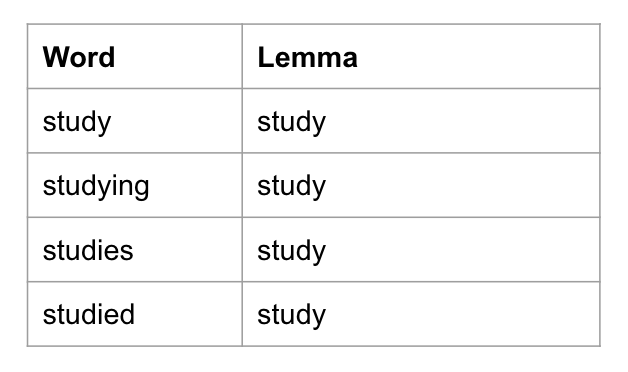

In [42]:
## non-sense sample text with similar words
text = "I delivered the delivery and am always delivering \
my deliveries on time. \
He delivers late. This is my deliverance! \
This is a fragment of some fragments. \
When it was fragmented what happens to \
fragmentation or even fragmentations? \
The economic reality is that global economies \
are in for a rough time and people will find it \
difficult no matter how much they economize. "

In [43]:
## create spacy object by running through NLP pipeline
doc = nlp(text)

In [44]:
## lemmatize the words
## note how they have gone down to the root words

for token in doc:
    print(token.text)
    print(token.lemma_)


I
delivered
the
delivery
and
am
always
delivering
my
deliveries
on
time
.
He
delivers
late
.
This
is
my
deliverance
!
This
is
a
fragment
of
some
fragments
.
When
it
was
fragmented
what
happens
to
fragmentation
or
even
fragmentations
?
The
economic
reality
is
that
global
economies
are
in
for
a
rough
time
and
people
will
find
it
difficult
no
matter
how
much
they
economize
.


In [49]:
lemma_list = []
for token in doc:
    if token.is_stop == False and\
    token.is_punct == False:
        lemma_list.append(token.lemma_)

In [50]:
lemma_list

['deliver',
 'delivery',
 'deliver',
 'delivery',
 'time',
 'deliver',
 'late',
 'deliverance',
 'fragment',
 'fragment',
 'fragment',
 'happen',
 'fragmentation',
 'fragmentation',
 'economic',
 'reality',
 'global',
 'economy',
 'rough',
 'time',
 'people',
 'find',
 'difficult',
 'matter',
 'economize']

In [52]:
Counter(lemma_list).most_common(5)

[('deliver', 3),
 ('fragment', 3),
 ('delivery', 2),
 ('time', 2),
 ('fragmentation', 2)]

In [ ]:
## lemma via lc


In [ ]:
## call lemma list


In [ ]:
## type?


## Remove Stop words

In [ ]:
## pull out a word from list


In [ ]:
## is it a stopword?


## This will run through the entire lemmatized list but keep only words that are NOT stop words or punctuation and place in a list.

In [ ]:
## code here


In [ ]:
## Here are the non-stop words in the list



## Let's count their frequency

In [ ]:
## use counter to count the frequency of words in the terms list


In [ ]:
## type


In [ ]:
## pull out the 10 most frequently used words (roots, variations and all)
